<a href="https://colab.research.google.com/github/supulkalhara/Data_Science/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

Data Collection and Analsyis

In [431]:
df = pd.read_csv('/content/train.csv')

In [432]:
df.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.50,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.00,43.50,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.00,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.00,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.00,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6
5,6.6,NaN,NaN,71.50,13.0,0.052,0.999125,18.0,0.527630,NaN,143.0,0.99825,3.37,0.49,9.4,6
6,9.1,0.28,0.49,56.00,2.0,0.059,0.997898,10.0,0.498311,0.84,112.0,0.99580,3.15,0.46,10.1,5
7,7.5,0.35,0.48,88.25,12.4,0.056,0.999015,61.0,0.472756,1.05,176.5,0.99803,2.97,0.52,NaN,5
8,7.4,0.31,0.48,102.00,14.2,0.042,0.999150,62.0,0.485721,0.93,204.0,0.99830,3.06,0.59,9.4,5
9,6.9,0.33,0.31,67.50,7.7,0.040,0.996122,29.0,0.492760,0.99,135.0,0.99226,3.11,0.57,12.3,5


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3258 non-null   float64
 1   x2      3261 non-null   float64
 2   x3      3253 non-null   float64
 3   x4      3265 non-null   float64
 4   x5      3248 non-null   float64
 5   x6      3258 non-null   float64
 6   x7      3262 non-null   float64
 7   x8      3246 non-null   float64
 8   x9      3263 non-null   float64
 9   x10     3261 non-null   float64
 10  x11     3265 non-null   float64
 11  x12     3264 non-null   float64
 12  x13     3265 non-null   float64
 13  x14     3265 non-null   float64
 14  x15     3191 non-null   float64
 15  y       3265 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 408.2 KB


Checking Missing Values

In [434]:
df.isnull().sum()

x1      7
x2      4
x3     12
x4      0
x5     17
x6      7
x7      3
x8     19
x9      2
x10     4
x11     0
x12     1
x13     0
x14     0
x15    74
y       0
dtype: int64

Handling missing values

In [435]:
#impute missing values using Mean
df['x1'].mean()


6.856292203806008

In [436]:
#filling the missing values in x1 with mean value
df['x1'].fillna(df['x1'].mean(), inplace = True)

In [437]:
df.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.50,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.00,43.50,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.00,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.00,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.00,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6
5,6.6,NaN,NaN,71.50,13.0,0.052,0.999125,18.0,0.527630,NaN,143.0,0.99825,3.37,0.49,9.4,6
6,9.1,0.28,0.49,56.00,2.0,0.059,0.997898,10.0,0.498311,0.84,112.0,0.99580,3.15,0.46,10.1,5
7,7.5,0.35,0.48,88.25,12.4,0.056,0.999015,61.0,0.472756,1.05,176.5,0.99803,2.97,0.52,NaN,5
8,7.4,0.31,0.48,102.00,14.2,0.042,0.999150,62.0,0.485721,0.93,204.0,0.99830,3.06,0.59,9.4,5
9,6.9,0.33,0.31,67.50,7.7,0.040,0.996122,29.0,0.492760,0.99,135.0,0.99226,3.11,0.57,12.3,5


In [438]:
df.isnull().sum()

x1      0
x2      4
x3     12
x4      0
x5     17
x6      7
x7      3
x8     19
x9      2
x10     4
x11     0
x12     1
x13     0
x14     0
x15    74
y       0
dtype: int64

In [439]:
df['x2'].fillna(df['x2'].mean(), inplace = True)
df['x3'].fillna(df['x3'].mean(), inplace = True)
df['x5'].fillna(df['x5'].mean(), inplace = True)
df['x6'].fillna(df['x6'].mean(), inplace = True)
df['x7'].fillna(df['x7'].mean(), inplace = True)
df['x8'].fillna(df['x8'].mean(), inplace = True)
df['x9'].fillna(df['x9'].mean(), inplace = True)
df['x10'].fillna(df['x10'].mean(), inplace = True)
df['x12'].fillna(df['x12'].mean(), inplace = True)
df['x15'].fillna(df['x15'].mean(), inplace = True)


#for loop

# for column in df:
#   df[column].fillna(df[column].mean(), inplace=True)


In [440]:
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
y      0
dtype: int64

Data Analysis


In [441]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
count,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000
mean,6.856292,0.277301,0.336846,69.016309,6.413608,0.045777,0.998058,35.345656,0.502590,0.831760,138.157580,0.994021,3.186873,0.489871,10.524632,5.887289
std,0.856820,0.101800,0.123164,21.432054,5.097869,0.021737,0.079577,16.534030,0.023234,0.305677,42.709637,0.003047,0.150802,0.114568,1.230853,0.885705
min,3.800000,0.080000,0.000000,4.500000,0.600000,0.009000,0.000300,2.000000,0.000300,0.010000,9.000000,0.987220,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,53.500000,1.700000,0.036000,0.995841,23.500000,0.488551,0.630000,107.000000,0.991700,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,66.500000,5.200000,0.043000,0.996860,34.000000,0.502427,0.780000,133.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,83.500000,9.900000,0.050000,0.998098,46.000000,0.515874,0.960000,167.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,172.000000,65.800000,0.346000,5.432281,138.500000,0.580925,3.300000,344.000000,1.038980,3.810000,1.080000,14.050000,9.000000


Numerical Features

<Figure size 432x288 with 0 Axes>

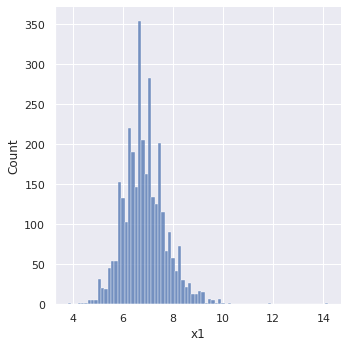

In [442]:
sns.set()

# x1 distribution
plt.figure(figsize=(6,4))
sns.displot(df['x1'])
plt.show()

Slitting features and Target

In [443]:
df.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.340000,0.370000,66.50,6.2,0.031,0.995369,42.0,0.511883,1.02000,133.0,0.99076,3.25,0.41,12.500000,6
1,6.1,0.410000,0.000000,43.50,1.6,0.063,0.995691,36.0,0.514548,1.23000,87.0,0.99140,3.27,0.67,10.800000,6
2,7.5,0.260000,0.300000,46.00,4.6,0.027,0.995414,29.0,0.498311,0.78000,92.0,0.99085,3.15,0.38,12.000000,7
3,7.4,0.200000,0.290000,50.00,1.7,0.047,0.996208,16.0,0.515874,0.60000,100.0,0.99243,3.28,0.45,10.600000,6
4,7.3,0.230000,0.240000,43.00,0.9,0.031,0.994616,29.0,0.462398,0.69000,86.0,0.98926,2.90,0.38,12.200000,6
5,6.6,0.277301,0.336846,71.50,13.0,0.052,0.999125,18.0,0.527630,0.83176,143.0,0.99825,3.37,0.49,9.400000,6
6,9.1,0.280000,0.490000,56.00,2.0,0.059,0.997898,10.0,0.498311,0.84000,112.0,0.99580,3.15,0.46,10.100000,5
7,7.5,0.350000,0.480000,88.25,12.4,0.056,0.999015,61.0,0.472756,1.05000,176.5,0.99803,2.97,0.52,10.524632,5
8,7.4,0.310000,0.480000,102.00,14.2,0.042,0.999150,62.0,0.485721,0.93000,204.0,0.99830,3.06,0.59,9.400000,5
9,6.9,0.330000,0.310000,67.50,7.7,0.040,0.996122,29.0,0.492760,0.99000,135.0,0.99226,3.11,0.57,12.300000,5


In [444]:
X = df.drop(columns='y', axis=1)
Y = df['y']
print(X)

       x1    x2    x3     x4     x5     x6        x7    x8        x9   x10  \
0     5.2  0.34  0.37   66.5   6.20  0.031  0.995369  42.0  0.511883  1.02   
1     6.1  0.41  0.00   43.5   1.60  0.063  0.995691  36.0  0.514548  1.23   
2     7.5  0.26  0.30   46.0   4.60  0.027  0.995414  29.0  0.498311  0.78   
3     7.4  0.20  0.29   50.0   1.70  0.047  0.996208  16.0  0.515874  0.60   
4     7.3  0.23  0.24   43.0   0.90  0.031  0.994616  29.0  0.462398  0.69   
...   ...   ...   ...    ...    ...    ...       ...   ...       ...   ...   
3260  6.8  0.18  0.30   85.5  12.80  0.062  0.999040  19.0  0.477121  0.54   
3261  7.5  0.33  0.48  121.5  19.45  0.048  1.000500  55.0  0.469822  0.99   
3262  6.5  0.24  0.24   30.0   1.60  0.046  0.996393  15.0  0.503791  0.72   
3263  6.8  0.28  0.29   90.0  11.90  0.052  0.997717  51.0  0.480007  0.84   
3264  7.0  0.17  0.74   63.0  12.80  0.045  0.997096  24.0  0.513218  0.51   

        x11      x12   x13   x14   x15  
0     133.0  0.99076  

Feature Engineering

In [446]:
#Pearson Correlation

corMatrix = df.corr()


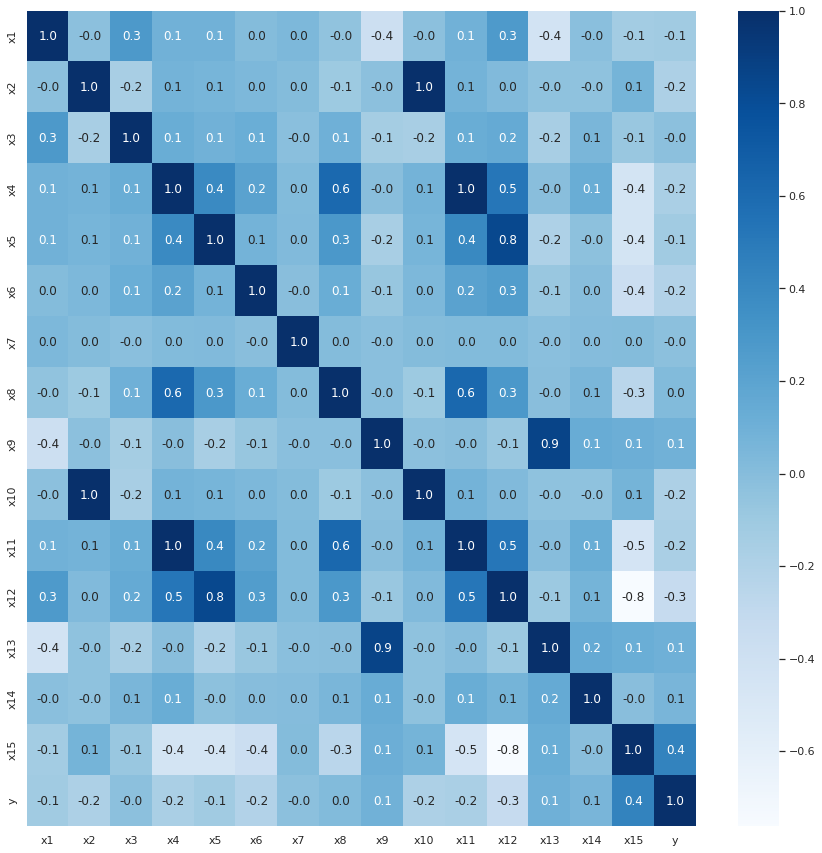

In [447]:
plt.figure(figsize=(15,15))
sns.heatmap(corMatrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')


X2 - X10 -> 0.999638,
X4 - X11 -> 0.995383,
X5 - X12 -> 0.838183,
X9 - X13 -> 0.867719	


In [448]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [449]:
# x7 distribution
# plt.figure(figsize=(6,4))
# sns.displot(df['x7'], aspect=5)
# plt.show()

In [450]:
X = X.drop(columns='x10', axis=1)


In [451]:
X = X.drop(columns='x11', axis=1)


In [452]:
X = X.drop(columns='x5', axis=1)

In [453]:
X = X.drop(columns='x13', axis=1)

In [454]:
X.head()

,x1,x2,x3,x4,x6,x7,x8,x9,x12,x14,x15
0,5.2,0.34,0.37,66.5,0.031,0.995369,42.0,0.511883,0.99076,0.41,12.5
1,6.1,0.41,0.00,43.5,0.063,0.995691,36.0,0.514548,0.99140,0.67,10.8
2,7.5,0.26,0.30,46.0,0.027,0.995414,29.0,0.498311,0.99085,0.38,12.0
3,7.4,0.20,0.29,50.0,0.047,0.996208,16.0,0.515874,0.99243,0.45,10.6
4,7.3,0.23,0.24,43.0,0.031,0.994616,29.0,0.462398,0.98926,0.38,12.2


In [457]:
Y = df['y']

In [458]:
mi_scores = make_mi_scores(X, Y)

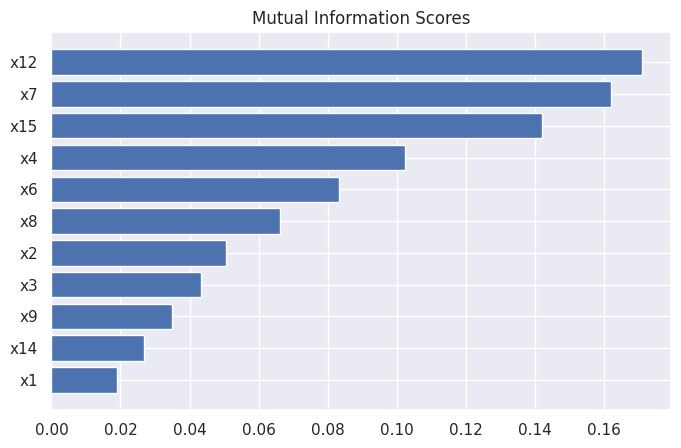

In [459]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Machine Learning Model Training using XGBoost Regressor

In [461]:
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression()

Evaluation

In [462]:
#prediction on training data

x_train = regressor.predict(X)

In [463]:
# R Squared Value
r2_train = metrics.r2_score(Y, x_train)

In [464]:
print('R Squared Value : ' , r2_train)

R Squared Value :  0.26203053443102886


In [465]:
metrics.mean_squared_error(Y,x_train)

0.5787404071602569

0.26203053443102886
0.5787404071602569

In [466]:
X['y'] = Y
X.head() 

,x1,x2,x3,x4,x6,x7,x8,x9,x12,x14,x15,y
0,5.2,0.34,0.37,66.5,0.031,0.995369,42.0,0.511883,0.99076,0.41,12.5,6
1,6.1,0.41,0.00,43.5,0.063,0.995691,36.0,0.514548,0.99140,0.67,10.8,6
2,7.5,0.26,0.30,46.0,0.027,0.995414,29.0,0.498311,0.99085,0.38,12.0,7
3,7.4,0.20,0.29,50.0,0.047,0.996208,16.0,0.515874,0.99243,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.031,0.994616,29.0,0.462398,0.98926,0.38,12.2,6


In [467]:
X.to_csv('190482K_lab1_train.csv')

In [468]:
test_data = pd.read_csv('/content/test.csv')


In [469]:
test_data.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,7.0,0.53,0.02,53.5,1.0,0.036,0.996494,39.0,0.505150,1.59,107.0,0.99300,3.20,0.32,9.0
1,7.4,0.34,0.30,84.5,14.9,0.037,0.998489,70.0,0.511883,1.02,169.0,0.99698,3.25,0.37,10.4
2,7.0,0.27,0.29,99.5,3.9,0.059,0.998048,28.0,0.549003,0.81,199.0,0.99610,3.54,0.59,10.3
3,5.9,0.25,0.27,40.5,1.5,0.029,0.994585,37.0,0.505150,0.75,81.0,0.98920,3.20,0.46,12.2
4,6.6,0.30,0.24,60.5,1.2,0.034,0.996644,17.0,0.495544,0.90,121.0,0.99330,3.13,0.36,9.2


In [470]:
#prediction on test data

for column in test_data:
  test_data[column].fillna(test_data[column].mean(), inplace=True)

X = test_data.drop(columns='x10', axis=1)
X = X.drop(columns='x11', axis=1)
X = X.drop(columns='x5', axis=1)
X = X.drop(columns='x13', axis=1)


test_predict = regressor.predict(X)

In [471]:
X.to_csv('190482K_lab1_test.csv')